# Mount to Google driver

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
cd /content/drive/'My Drive'/'Colab Notebooks'/yolo_opencv_deepsort/

/content/drive/My Drive/Colab Notebooks/yolo_opencv_deepsort


# Install opencv

In [3]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7MB 75kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


# Run demo detect with yolo on CPU

In [11]:
import cv2 as cv
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
sys.path
sys.path.append('./yolo')
from DetectorYolo3 import DetectorYolo3_CPU

In [8]:
def DrawBoxes(detections, img):
	for detection in detections:		
		xmin, ymin, xmax, ymax = detection		
		pt1 = (xmin, ymin)
		pt2 = (xmax, ymax)
		cv.rectangle(img, pt1, pt2, (0, 255, 0), 1)		
	return img

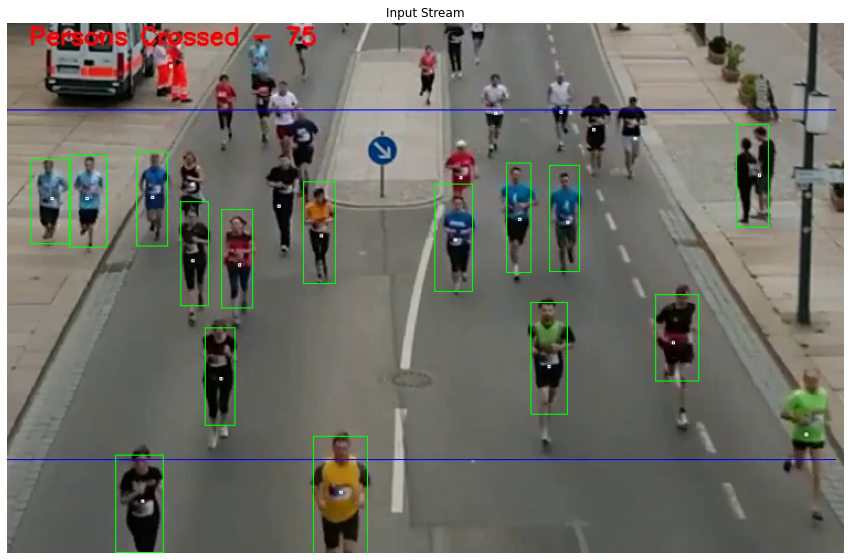

Cannot read frame from media


In [18]:
vin="./videos/running.mp4"    
vout="outputvideo.avi"
writeVideo_flag=False

## Create a detector
configPath = "./yolo/yolov3-tiny.cfg"
weightPath = "./yolo/yolov3-tiny.weights"
metaPath = "./yolo/coco.data"
classPath="./yolo/coco.names" 
confThr=0.3
nmsThr=0.6
detector=DetectorYolo3_CPU(configPath,weightPath,classPath)

## Create a video cap
cap = cv.VideoCapture(vin)
frameW=int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frameH=int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    
print("Start detecting...")
frameNo=0       
if writeVideo_flag == True:
  fourcc = cv.VideoWriter_fourcc(*'MJPG')
  out = cv.VideoWriter(vout, fourcc, 15, (frameW, frameH))

while True:
  ret, frame = cap.read()
  if not ret:
    print('Cannot read frame from media')
    break       
  boxes=detector.predict(frame,'person',confThr,nmsThr,32,64)                 
  frame=DrawBoxes(boxes,frame)  
  if writeVideo_flag:    
    out.write(frame) # write to video  
    
  frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
  clear_output(wait=True)
  plt.figure(figsize=(15,10))
  plt.axis('off')        
  plt.title("Input Stream")        
  plt.imshow(frame)
  plt.show()    
  frameNo=frameNo+1
cap.release()
if writeVideo_flag:
      out.release()